<a href="https://colab.research.google.com/github/RamiroCabri1/Telecom_X_parte_2/blob/main/TelecomX_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TELECOM_X Parte 2

## Índice

1.  Entendimiento Inicial del Dataset
    1.1. Valores nulos
    1.2. Función Shape e Info
    1.3. Filas duplicadas
2.  Análisis de la Variable Objetivo/target (Churn)
    2.1. Balance de Clases
    2.2. Uso de la función MAP para la clase Gender
3.  Matriz de correlación
    3.1. Get_Dummies
    3.2. Matriz
    3.3. Relación con Churn
4.  Creación de un modelo Baseline
    4.1. Métricas para el Baseline
5.  Random Forest
    5.1. Separación, Modelo, Pipeline y validación cruzada
    5.2. Evaluación del modelo
    5.3. Optimización de Hiperparámetros con GridSearchCV
    5.4. Modelo Óptimo
    5.5. Análisis de variables
6.  Decision Tree
    6.1. Modelo, Pipeline
    6.2. Validación Cruzada
    6.3. Optimización de Hiperparámetros con GridSearchCV
    6.4. Modelo Óptimo
7.  K-Vecinos Más Cercanos
    7.1. Separación, Modelo, Pipeline y validación cruzada
    7.2. Validación Cruzada
    7.3. Optimización de Hiperparámetros con GridSearchCV
    7.4. Modelo Óptimo
8.  Comparación entre modelos
    8.1. Resultados FN
    8.2. Comparación de ROC
Análisis Final y Conclusiones

In [1]:
import pandas as pd

In [2]:
path = "/content/drive/MyDrive/DataAnalisis/Alura/df_telecomX"
df = pd.read_csv(path)

In [3]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,1,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.116129
1,0003-MKNFE,0,Male,0,0,0,9,1,2,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.932258
2,0004-TLHLJ,1,Male,0,0,0,4,1,1,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.383871
3,0011-IGKFF,1,Male,1,1,0,13,1,1,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.161290
4,0013-EXCHZ,1,Female,1,1,0,3,1,1,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.706452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,1,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.779032
7039,9992-RRAMN,1,Male,0,1,0,22,1,2,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.745161
7040,9992-UJOEL,0,Male,0,0,0,2,1,1,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.622581
7041,9993-LHIEB,0,Male,0,1,1,67,1,1,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.188710


# EDA

Con base en mi experiencia previa en el análisis descriptivo y visual del conjunto de datos, he decidido que en este notebook me centraré en los puntos cruciales de la preparación de características para el modelado de clasificación. El análisis exploratorio de datos (EDA) completo, incluyendo visualizaciones detalladas y el análisis de outliers y correlaciones, se encuentra disponible en mi repositorio en GitHub: https://github.com/RamiroCabri1/Telecom_X.

A continuación, la sección de EDA de este notebook abordará los siguientes puntos:

Codificación de variables: Transformaré las variables categóricas a un formato numérico adecuado para los algoritmos. Aunque algunas variables binarias ya han sido convertidas a 0 y 1, evaluaré la necesidad de aplicar One-Hot Encoding a otras variables categóricas, como "Tipo de contrato" o "Servicios de Internet", para evitar que el modelo infiera una relación ordinal incorrecta.

Manejo del desequilibrio de clases: Es de mi conocimiento que la variable objetivo, Churn, presenta un desequilibrio significativo. Para abordar este problema, implementaré técnicas de remuestreo como el oversampling con el método SMOTE (Synthetic Minority Over-sampling Technique). Esto me permitirá balancear la distribución de las clases, lo que es fundamental para que el modelo no se sesgue hacia la clase mayoritaria y pueda predecir con mayor precisión la clase minoritaria (la de los clientes que se van).

Normalización/Estandarización de datos: Finalmente, escalaré las variables numéricas para que tengan una media de cero y una desviación estándar de uno. Este paso es crucial para optimizar el rendimiento de algoritmos que son sensibles a la escala de las características, como la regresión logística y la máquina de vectores de soporte (SVM).


##1_  Entendimiento Inicial del Dataset

### 1.1-Valores nulos.

In [4]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Sin valores nulos

In [5]:
df.drop(columns=["customerID"],inplace=True)

Se elimina la columna customerID

In [6]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0,Female,0,1,1,9,1,1,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.116129
1,0,Male,0,0,0,9,1,2,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.932258
2,1,Male,0,0,0,4,1,1,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.383871
3,1,Male,1,1,0,13,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.161290
4,1,Female,1,1,0,3,1,1,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.706452


### 1.2-Funcion Shape e Info.

In [7]:
df.shape

(7043, 21)

El dataframe presenta 7043 filas, con 21 columnas ( luego de una primera eliminacion de customerID ). Es muy probable que luego se realicen modificaciones a este columna.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


### 1.3-Filas duplicadas.

In [9]:
df.duplicated().sum()

np.int64(22)

In [10]:
df.drop_duplicates(inplace=True)

22 filas fueron removidas.

In [11]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges_Monthly,Charges_Total,Cuentas Diarias
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.264492,0.162512,0.484546,0.300527,32.469449,0.902863,1.326022,0.287566,0.345962,0.344965,0.291127,0.385558,0.389118,0.592651,64.851894,2286.765026,2.091997
std,0.441094,0.368947,0.499797,0.458520,24.534965,0.296166,0.643479,0.452660,0.475715,0.475391,0.454314,0.486761,0.487585,0.491376,30.069001,2266.855057,0.969968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.588710
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,403.350000,1.153226
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.400000,1400.550000,2.270968
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3801.700000,2.900000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.830645


##2_Análisis de la Variable Objetivo/target (Churn)

### 2.1 Balance de Clases

In [12]:
df.Churn.value_counts(normalize=True).round(2)*100

,proportion
Churn,
0,74.0
1,26.0


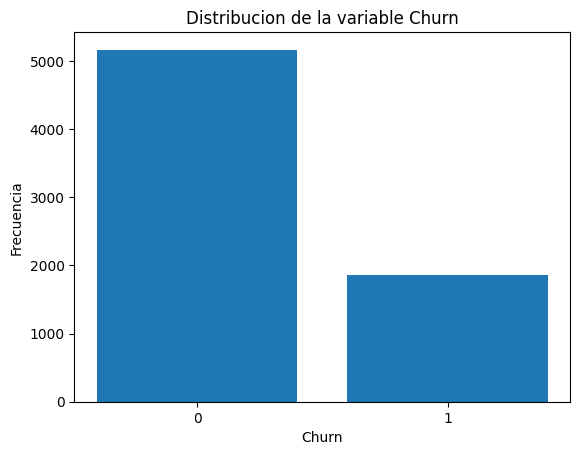

In [13]:
import matplotlib.pyplot as plt

plt.bar(df.Churn.value_counts().index,df.Churn.value_counts())
plt.title("Distribucion de la variable Churn")
plt.ylabel("Frecuencia")
plt.xlabel("Churn")
plt.xticks(df.Churn.value_counts().index)
plt.show()

Se puede observar que existe un asimetria entre los clientes que se quedan y se van. Esto puede afectar al modelo de clasificacion al momento de entrenar el mismo y como puede luego generalizar. En pasos posteriores modificare esta "asimetria" con tecnicas de muestreo como el oversampling y la funcion SMOTE.

### 2.2 Uso de la funcion MAP para la clase Gender

In [14]:
df.gender.value_counts()

,count
gender,
Male,3541
Female,3480


Esta clase, al ser binaria, puede ser convertida directamente a valores numéricos discretos 0 y 1. De esta manera, no será necesario incluirla en el proceso de One-Hot Encoding, lo que contribuirá a reducir la dimensionalidad del DataFrame de entrenamiento. Esta práctica es una buena estrategia para optimizar el rendimiento de los modelos al mantener el conjunto de datos más conciso y eficiente.

In [15]:
# Modificacion con el uso de la funcion map.

df.gender = df.gender.map({"Female":0,"Male":1})

In [16]:
df.head(2)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas Diarias
0,0,0,0,1,1,9,1,1,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.116129
1,0,1,0,0,0,9,1,2,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.932258


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7021 non-null   int64  
 1   gender            7021 non-null   int64  
 2   SeniorCitizen     7021 non-null   int64  
 3   Partner           7021 non-null   int64  
 4   Dependents        7021 non-null   int64  
 5   tenure            7021 non-null   int64  
 6   PhoneService      7021 non-null   int64  
 7   MultipleLines     7021 non-null   int64  
 8   InternetService   7021 non-null   object 
 9   OnlineSecurity    7021 non-null   int64  
 10  OnlineBackup      7021 non-null   int64  
 11  DeviceProtection  7021 non-null   int64  
 12  TechSupport       7021 non-null   int64  
 13  StreamingTV       7021 non-null   int64  
 14  StreamingMovies   7021 non-null   int64  
 15  Contract          7021 non-null   object 
 16  PaperlessBilling  7021 non-null   int64  
 17  

Como podemos ver ahora son solo 3 columnas las que presentan tipos categoricos, las cuales deberemos modificar.

##3_Matriz de correlacion.

### 3.1-Get_Dummies

In [18]:
columnas_categoricas = ['InternetService', 'Contract', 'PaymentMethod'] #

# Aplicamos pd.get_dummies()
df = pd.get_dummies(df, columns=columnas_categoricas, dtype=int)


df

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,2,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,13,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,1,1,0,1,0,22,1,2,0,0,...,0,1,0,1,0,0,0,0,1,0
7040,0,1,0,0,0,2,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
7041,0,1,0,1,1,67,1,1,1,0,...,1,0,0,0,0,1,0,0,0,1


 El análisis de correlación es una etapa crucial del EDA que se debe realizar con todos los datos disponibles. Por lo tanto realizaremos esta exploracion antes de la division ed los datos.

Este código creará un nuevo DataFrame (df_dummies) donde las columnas categóricas restantres serán reemplazadas por nuevas columnas binarias. Sin embargo esta no sera la transformacion final de los datos. Ya que utilizaremos OHE que es una transformacion mas recomendada para modelos de clasificacion.

Por el momento y para poder obervar la relacion entre variables dependientes e independientes, asi como la relacion con la variables churn, get_dummies nos sera de mucha utilidad.

La correlación nos da una visión rápida y directa de cuáles son las variables que tienen la relación más fuerte o más débil con nuestra variable de respuesta (en este caso, churn). Nos permitirá tener una mayor comprensión del negocio y de los factores más influyentes, lo cual es crucial para lograr un modelo que generalice mejor.

###3.2-Matriz

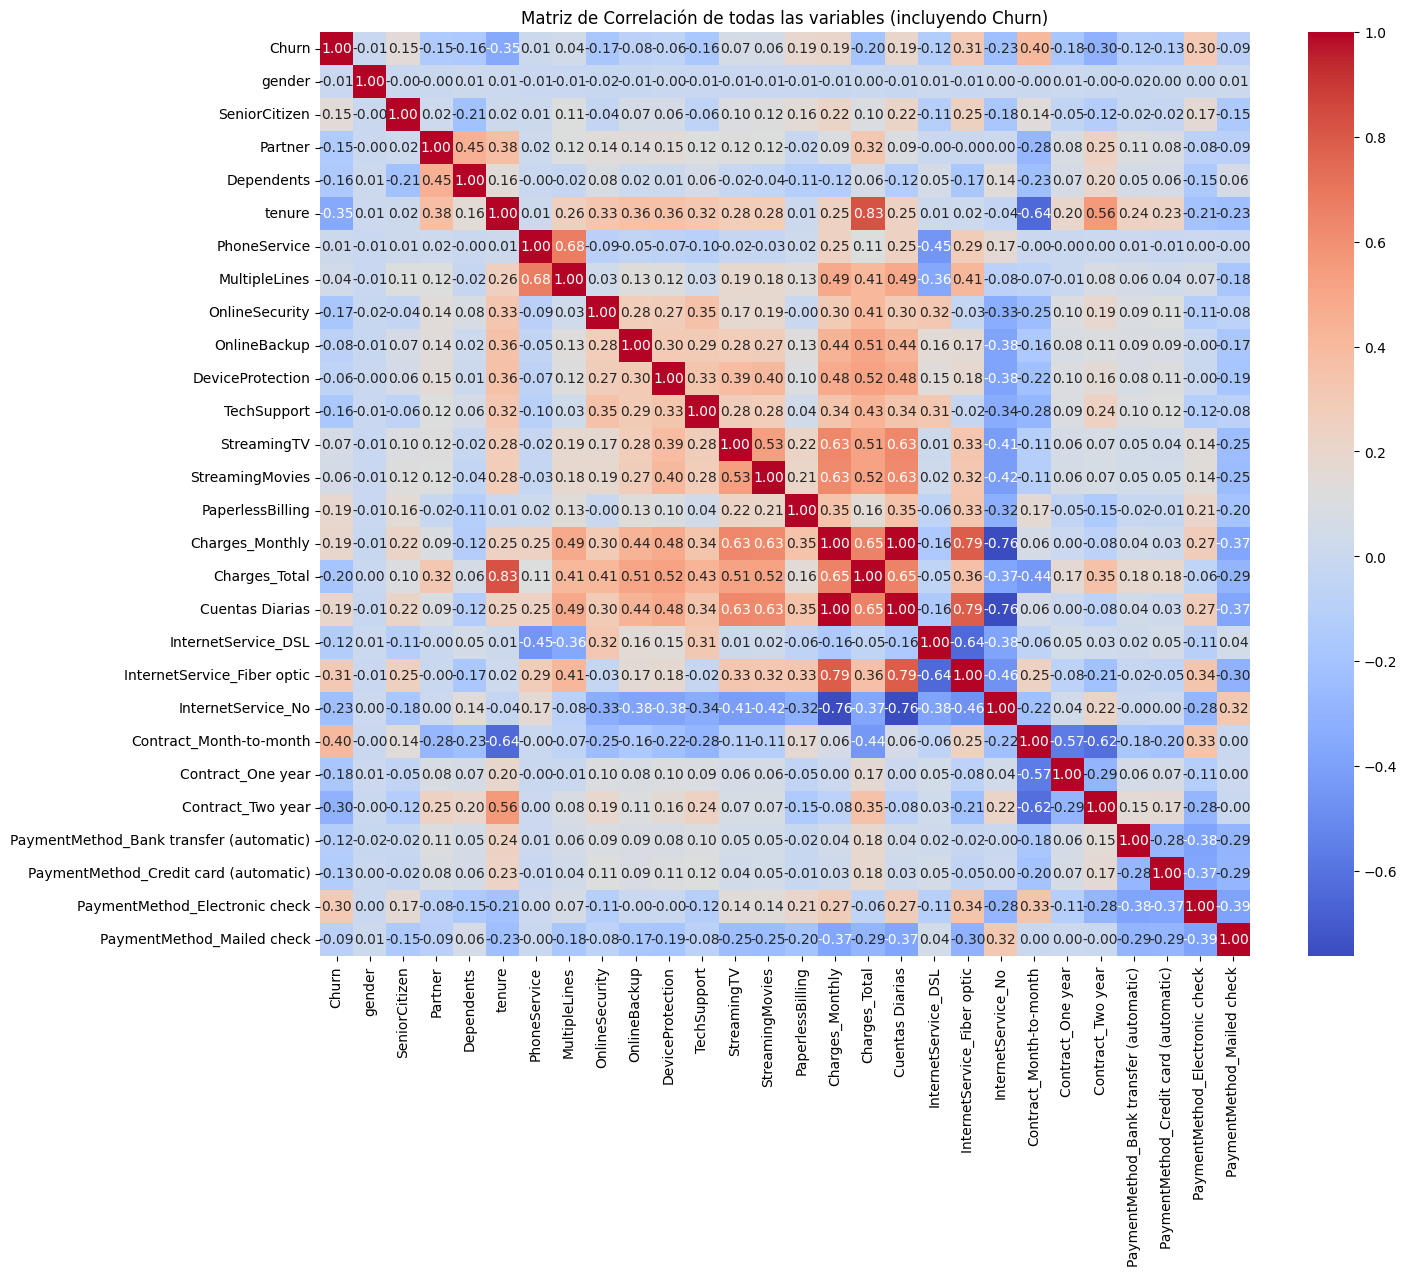

In [19]:
# Calcular y visualizar la matriz de correlación
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de todas las variables (incluyendo Churn)')
plt.show()

Al analizar la correlación entre las variables predictoras entre sí, podemos identificar la multicolinealidad, un problema que puede afectar negativamente al modelo, ya que las variables que son muy parecidas entre ella afectan al modelo. Lo ideal seria que en entre variables dependientes e independientes exista un valor cercano a 1. Esto muestra relacion positiva entre ellas y nos da a entender que la variable independiente "explica" en cierta forma a la "dependiente" o target.

Por el otro lado, una relacion positiva entre variables independientes deberia ser evitado.



***Correlación Fuerte/Moderada con Churn:***

**Tenure**: tiene una correlación negativa de -0.35. Esto significa que a mayor antigüedad del cliente, menor es la probabilidad de Churn.

**Contract_Month**-to-month: tiene una correlación positiva de 0.4. Esto es una relación muy fuerte y lógica; los clientes con contratos mensuales tienen más libertad para irse.

**PaperlessBilling y PaymentMethod_Electronic check **también tienen correlaciones positivas con Churn (0.19 y 0.30 respectivamente), sugiriendo que estos servicios y métodos de pago están asociados a una mayor tasa de abandono.

***Correlación Débil con Churn:***

**gender, SeniorCitizen, PhoneService y MultipleLines** tienen correlaciones muy cercanas a cero. Esto indica que estas variables, individualmente, tienen muy poca o nula relación lineal con el Churn.

***Multicolinealidad***
Se observa multicolinealidad, lo que es muy común en este tipo de datasets. Podriamos decir que estas variables estan entre si relacionadas. De cualquier manera se observan en su mayoria como "moderadas", teniendo valores cercanos a 0.50.

**Tenure vs TotalCharges: **La correlación es muy alta (0.83). Esto tiene sentido, ya que a mayor antigüedad (tenure), mayores serán los cargos totales (TotalCharges).

**PhoneService vs MultipleLines:** Tienen una correlación de 0.28.

**InternetService_Fiber optic vs PaperlessBilling y MonthlyCharges: **Se puede ver una correlación positiva moderada. Por ejemplo, InternetService_Fiber optic y MonthlyCharges tienen una correlación de 0.78, lo que sugiere que los clientes con este servicio de internet tienen cargos mensuales más altos.



###3.3-Relacion con Churn

In [20]:
correlacion = df.corr()['Churn'].sort_values(ascending=False).round(4)
correlacion

,Churn
Churn,1.0000
Contract_Month-to-month,0.4049
InternetService_Fiber optic,0.3082
PaymentMethod_Electronic check,0.3015
Charges_Monthly,0.1945
Cuentas Diarias,0.1945
PaperlessBilling,0.1909
SeniorCitizen,0.1516
StreamingTV,0.0650
StreamingMovies,0.0632


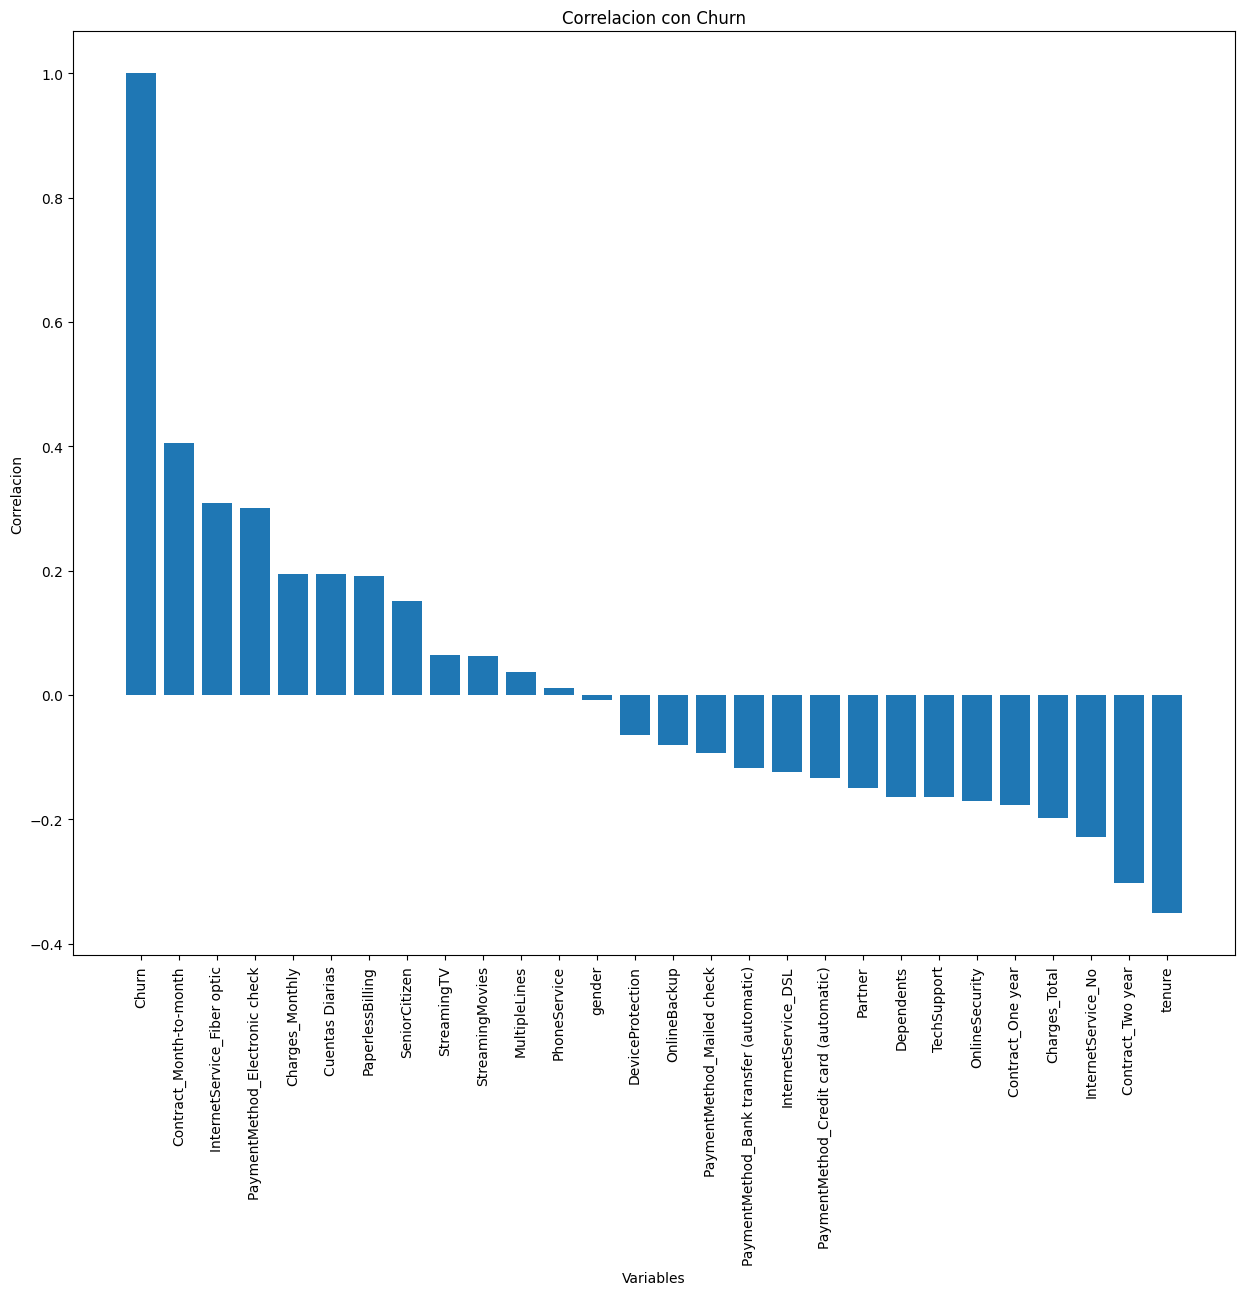

In [21]:
plt.figure(figsize=(15, 12))
plt.bar(correlacion.index,correlacion.values)
plt.title("Correlacion con Churn")
plt.xlabel("Variables")
plt.ylabel("Correlacion")
plt.xticks(rotation=90)
plt.show()


**Variables con alta correlación: **Solo un pequeño número de variables, como Contract_Month-to-month, tenure, InternetService_Fiber optic y Contract_Two year, tienen barras significativamente más altas, lo que indica una correlación más fuerte. Esto nos da un indicio claro, gran parte de las variables no poseen una correlacion alta con la variable target. A princio podriamos decir que no "explicarian" a la variable dependiente.

#MODELADO

##1_Separacion de variables X e Y.

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn"])
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Una vez realizada la separacion podremos realizar en la etapa de modelado one_hot_encoder sobre las X categoricas y normalizar la distribucion en X e Y train para intentar solucionar el desvalance en la variable target.

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Seleccion de las columnas categoricas restantes
categoricas = X_train.select_dtypes(include=['object']).columns
categoricas

Index([], dtype='object')

Las columnas seleccionadas seran procesadas con OHE (OneHotEncoder)

##2_OHE (OneHotEncoder) para variables categoricas.

In [24]:
#Creamos el objeto para hacer la transformacion con OHE
ohe = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), categoricas),
                              remainder='passthrough',
                              sparse_threshold=0,
                              force_int_remainder_cols=False)

Este procedimiento manual de ohe se realiza unicamente para el modelo baseline. Los modelos posteriores tendran un pipeline que automatizara este procedimiento para evitar "filtraciones".

In [25]:
# Realizo la transformacion.

X_train_transformed = ohe.fit_transform(X_train)
X_test_transformed = ohe.transform(X_test)

In [26]:
#Creacion de un nuevo DF con los valores de X transformados.

transformed_feature_names = ohe.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_feature_names)
X_train_transformed_df.head()


,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,...,remainder__InternetService_DSL,remainder__InternetService_Fiber optic,remainder__InternetService_No,remainder__Contract_Month-to-month,remainder__Contract_One year,remainder__Contract_Two year,remainder__PaymentMethod_Bank transfer (automatic),remainder__PaymentMethod_Credit card (automatic),remainder__PaymentMethod_Electronic check,remainder__PaymentMethod_Mailed check
0,1.0,1.0,1.0,0.0,50.0,1.0,2.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,72.0,1.0,2.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,13.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,61.0,1.0,2.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [27]:
print(X_train_transformed_df.columns)
print(len(X_train_transformed_df.columns))

Index(['remainder__gender', 'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'remainder__Charges_Monthly', 'remainder__Charges_Total',
       'remainder__Cuentas Diarias', 'remainder__InternetService_DSL',
       'remainder__InternetService_Fiber optic',
       'remainder__InternetService_No', 'remainder__Contract_Month-to-month',
       'remainder__Contract_One year', 'remainder__Contract_Two year',
       'remainder__PaymentMethod_Bank transfer (automatic)',
       'remainder__PaymentMethod_Credit card (automatic)',
       'remainder__PaymentMethod_Electronic check',
       'remainder__PaymentMethod_Mailed check'],
      dtype='object')
27


In [28]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 27 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   remainder__gender                                   5616 non-null   float64
 1   remainder__SeniorCitizen                            5616 non-null   float64
 2   remainder__Partner                                  5616 non-null   float64
 3   remainder__Dependents                               5616 non-null   float64
 4   remainder__tenure                                   5616 non-null   float64
 5   remainder__PhoneService                             5616 non-null   float64
 6   remainder__MultipleLines                            5616 non-null   float64
 7   remainder__OnlineSecurity                           5616 non-null   float64
 8   remainder__OnlineBackup                             5616 non-null   float64
 9

##3_Balanceo de clases.

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

print("Shape de X_train_resampled:", X_train_resampled.shape)
print("Shape de y_train_resampled:", y_train_resampled.shape)
print("Value counts de y_train_resampled:\n", y_train_resampled.value_counts())

Shape de X_train_resampled: (8264, 27)
Shape de y_train_resampled: (8264,)
Value counts de y_train_resampled:
 Churn
0    4132
1    4132
Name: count, dtype: int64


Es de recalcar que este proceso de SMOTE se realiza manualmente para el modelo baseline.

Los modelos posteriores utilizaran un pipeline que dentro de sus parametros tendran incorporado este procedimiento  (y otro) encapsulados.

In [30]:
y_train_resampled.value_counts(normalize=True)

,proportion
Churn,
0,0.5
1,0.5


In [31]:
import plotly.express as px

# Obtenemos valores
churn_counts = y_train_resampled.value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']


fig = px.pie(churn_counts, values='Count', names='Churn', title='Distribution of Churn in Resampled Training Data')
fig.show()

Ahora vemos normalizado la variable respuesta, por lo tanto el modelo base entrenara con menos sesgo.

##4_Creacion de un modelo Baseline.

In [32]:
from imblearn.pipeline import pipeline as ImbPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier


In [33]:
modelo_baseline = DummyClassifier()
modelo_baseline.fit(X_train_resampled, y_train_resampled)

DummyClassifier()

El modelo baseline demostró la importancia de las etapas siguientes. Sin este modelo inicial, no tendríamos una prueba concreta de la necesidad de técnicas de machine learning más avanzadas. No espeoro un resultado espectacular en el mismo, ni mucho menos, si un unicio al modelado.

###4.1_Metricas para el Baseline.

In [34]:
resultado_score_baselina = round(modelo_baseline.score(X_test_transformed, y_test),4)
print(f"La exactitud del modelo baseline es {resultado_score_baselina}")

La exactitud del modelo baseline es 0.7345


Si bien la excatitud es muy fuerte ( probablemente un sobre ajuste ), para el modelo en cuestion no sera la metrica mas importante que estaremos evaluando.

In [35]:
# Realizamos las predicciones en el conjunto de prueba
y_pred = modelo_baseline.predict(X_test_transformed)

Exactitud (Accuracy): 0.7345
Precisión (Precision): 0.0000
Sensibilidad (Recall): 0.0000
Puntuación F1 (F1-Score): 0.0000

Matriz de Confusión:
[[1032    0]
 [ 373    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



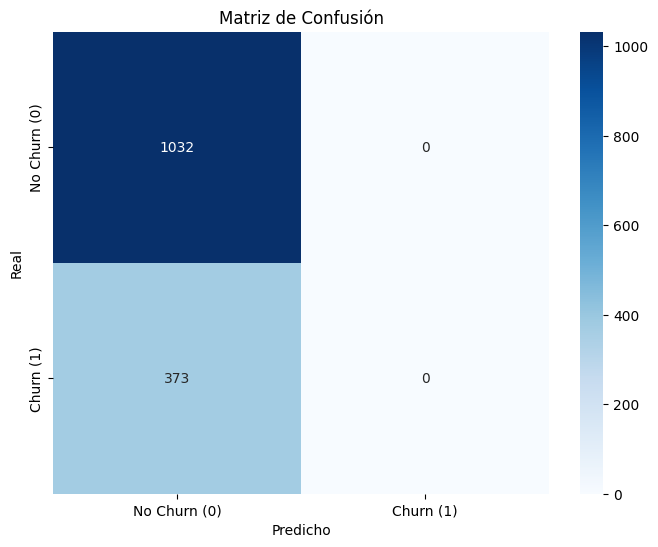

In [36]:
precision = precision_score(y_test, y_pred)
sensibilidad = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
matriz_confusion = confusion_matrix(y_test, y_pred)

print(f'Exactitud (Accuracy): {resultado_score_baselina:.4f}')
print(f'Precisión (Precision): {precision:.4f}')
print(f'Sensibilidad (Recall): {sensibilidad:.4f}')
print(f'Puntuación F1 (F1-Score): {f1:.4f}')
print('\nMatriz de Confusión:')
print(matriz_confusion)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

El modelo baseline demostró que un modelo simple, sin optimización, es completamente inútil para el problema de predecir el churn. El modelo no identificó a **ningún** cliente que hiciera churn (Falsos Negativos y Falsos Positivos iguales a cero).

##5_Random Forest

Para el caso de negocio, que es ***identificar a los clientes propensos al abandono*** para tomar medidas de retención, el costo de un Falso Negativo es mucho mayor que el de un Falso Positivo.

Falso Negativo (error tipo II): El modelo predice que un cliente no hará churn, pero en realidad sí lo hace. Esto es un gran problema, porque se pierde la oportunidad de intervenir y retener a ese cliente.

Falso Positivo (error tipo I): El modelo predice que un cliente sí hará churn, pero en realidad no lo hace. Esto puede resultar en un costo de marketing o una oferta de retención innecesaria, pero la empresa no pierde al cliente.

Por lo tanto, ***es más importante maximizar la Sensibilidad (Recall)***, que mide la capacidad del modelo para encontrar a todos los clientes que realmente hacen churn. Al hacer esto, nos aseguramos de minimizar los Falsos Negativos, que son los errores más costosos en este escenario.

Aunque el F1-Score es una métrica sólida que equilibra Precisión y Sensibilidad, si el objetivo principal es la detección, la Sensibilidad es la métrica más relevante para priorizar en la validación cruzada.

###5.1_Separacion, Modelo, Pipeline y validacion cruzada.

In [55]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

Realizamos otra division en X e y. La anterior solo fue creada con motivos de crear un modelo base, que deberia ser superado.

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier


# Identificamos las columnas categoricas y numericas, pensando en OHE y en estandarizacion.
categoricas = X.select_dtypes(include=['object']).columns
numericas = X.select_dtypes(include=['int64', 'float64']).columns

# Este Preprocessor, va a hacer OHE a las columnas categoricas y standarizacion a las numericas.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categoricas)
    ],
    remainder='passthrough'
)


Antes de crear el Pipeline (que va a encapsular el modelo y sus transformaciones) creamos un preprocessor.

La idea del mismo es crear un objeto que defina que hacer con los valores categoricos restantes (en este caso OHE) y los valores numericos (en este caso standarizacio). La estandarizacion (también conocida como normalización por puntuación Z) es un proceso que transforma los datos para que tengan una **media de 0 y una desviación estándar de 1.** Para cada valor en el conjunto de datos, StandardScaler resta la media y luego divide por la desviación estándar. cambia la escala de las variables sin alterar su distribución ni la forma en que se relacionan entre sí. Esto es crucial para modelos que son sensibles a la escala de las variables, como la regresión logística, máquinas de vectores de soporte (SVM) o K-vecinos más cercanos (KNN). Sin estandarizar, las variables con un rango de valores más grande (por ejemplo, TotalCharges) dominarían la función de distancia, lo que podría sesgar el modelo.


Para un modelo de **Random Forest**, la estandarización de los datos a una media de 0 y una desviación estándar de 1 no tiene sentido, pero se deja en el pipeline para luego utilzar algunos de estos modelos y no tener que especificamente incluirlo.

In [57]:
# Creo el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=5)

In [69]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Construir el pipeline completo con el preprocesador, SMOTE y el modelo
modelo_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', random_forest)
])

Una vez creado el modelo, se implementa un pipeline para encapsular las transformaciones y evitar la filtración de datos. Este proceso incluye la aplicación de One-Hot Encoding (OHE), SMOTE para el desbalance de clases y estandarización, pensando en su posterior aplicación a modelos de regresión.

In [71]:
from sklearn.model_selection import StratifiedKFold
# Definimos método de validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

###5.2_Evaluacion del modelo.

In [72]:

# Evaluar el pipeline completo
scores = cross_val_score(modelo_pipeline, X, y, cv=cv, scoring='recall', n_jobs=-1)

# Imprimir los resultados
print(f"Puntuaciones recall por fold: {scores}")
print(f"Puntuación recall promedio: {scores.mean():.4f}")
print(f"Desviación estándar de la puntuación F1: {scores.std():.4f}")

Puntuaciones recall por fold: [0.62365591 0.64150943 0.62264151 0.60107817 0.54301075]
Puntuación recall promedio: 0.6064
Desviación estándar de la puntuación F1: 0.0342


**Sensibilidad (Recall):** Una puntuación promedio de 0.61 significa que el modelo es capaz de identificar correctamente al 61% de los clientes que realmente hacen churn. Dado el problema de negocio (retener clientes), donde minimizar los Falsos Negativos es crucial, esta es una buena base.

**Consistencia**: La baja desviación estándar (0.0342) indica que el rendimiento del modelo es muy consistente a través de los 5 folds de la validación cruzada. Esto significa que no hay una gran variación en el rendimiento cuando se entrena y evalúa el modelo en diferentes subconjuntos de datos, lo que es un gran indicador de que el modelo no está sobreajustado.

In [60]:

# El pipeline internamente aplica OHE, SMOTE y entrena el modelo
modelo_pipeline.fit(X_train, y_train)


y_previsto = modelo_pipeline.predict(X_test)

# 3. Calcular la matriz de confusión para evaluar
matriz_confusion = confusion_matrix(y_test, y_previsto)
print(matriz_confusion)

[[876 156]
 [148 225]]



RECALL =


TP+FN
TP
​
 =
225+148
225
​
 ≈0.6032


El modelo identificó correctamente al 60.32% de los clientes que realmente hicieron churn.

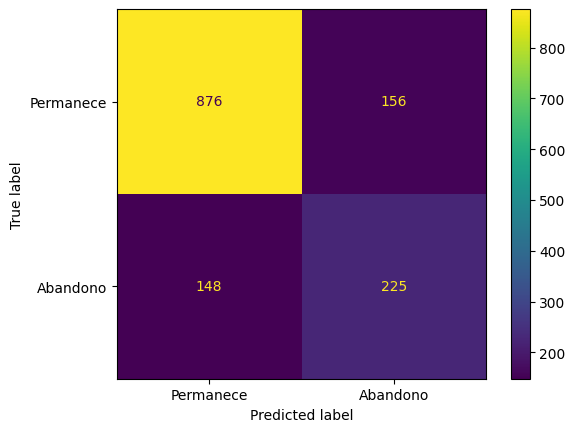

In [61]:

from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion,display_labels=['Permanece','Abandono'])
visualizacion.plot();

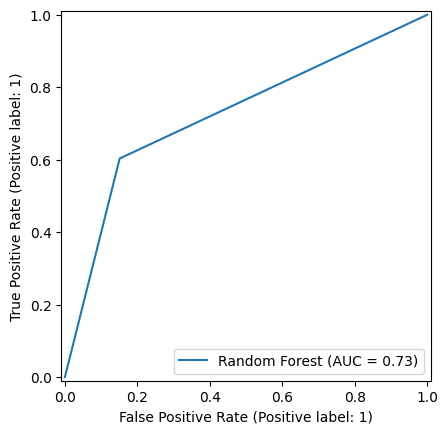

In [62]:

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_previsto,name='Random Forest');

El AUC nos da un valor muy aceptable de 0.73

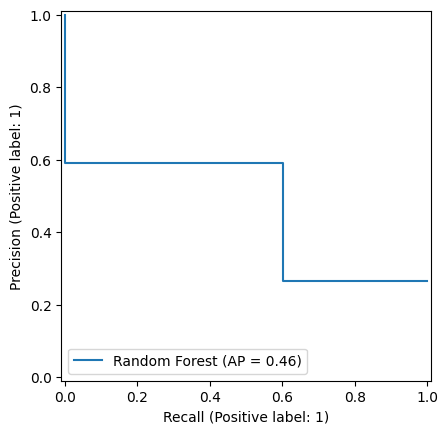

In [63]:
from sklearn.metrics import PrecisionRecallDisplay


PrecisionRecallDisplay.from_predictions(y_test,y_previsto,name='Random Forest');

***Sensibilidad vs. Precisión:*** Hay un compromiso entre estas dos métricas. No puedes se puede tener ambas en un nivel alto simultáneamente con este modelo. Para aumentar la sensibilidad (para encontrar más clientes que se van), se tendra que sacrificar la precisión (más falsos positivos).

La puntuación AP nos dice que, a pesar del balanceo en el entrenamiento, el modelo aún tiene dificultades para clasificar la clase minoritaria de manera precisa en los datos no vistos.

###5.3_Optimización de Hiperparámetros con GridSearchCV.

In [64]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_leaf': [1, 5, 10]
}

# Realiza la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(modelo_pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1)
# El Pipeline posee OHE y SMOTE, por lo tanto no debemos preocuparnos por X e Y
grid_search.fit(X, y)


print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación Recall promedio:", grid_search.best_score_)

Mejores hiperparámetros encontrados: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 200}
Mejor puntuación Recall promedio: 0.7382981190041444


***Análisis de los resultados***
***Mejores Hiperparámetros Encontrados:***

max_depth: 10

min_samples_leaf: 10

n_estimators: 200

El GridSearchCV identificó esta combinación como la que mejora el recall. Una max_depth de 10 evita el sobreajuste al no dejar que los árboles crezcan indefinidamente. Un min_samples_leaf de 10 ayuda a suavizar el modelo al requerir un número mínimo de muestras para que un nodo se considere una hoja. Finalmente, un n_estimators de 200 indica que el modelo se beneficia de un mayor número de árboles en el bosque.

Mejor Puntuación (Recall) Promedio: 0.7383

La mejora es notable. La puntuación promedio de recall aumentó de 0.6064 a 0.7383. Esto significa que el modelo ahora es capaz de identificar correctamente casi al 74% de los clientes que realmente hacen churn, lo que es una mejora sustancial y un gran resultado para el plan de negocio. .

###5.4_Modelo Optimo.

In [65]:
# Basicamente recramos todo pero con los nuevos datos para mejorar el recall que nos otorgo GridSearch
modelo_optimo = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=10,
    random_state=42
)


In [66]:
modelo_pipeline_final = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', modelo_optimo)
])

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1032
           1       0.56      0.73      0.63       373

    accuracy                           0.77      1405
   macro avg       0.72      0.76      0.73      1405
weighted avg       0.80      0.77      0.78      1405



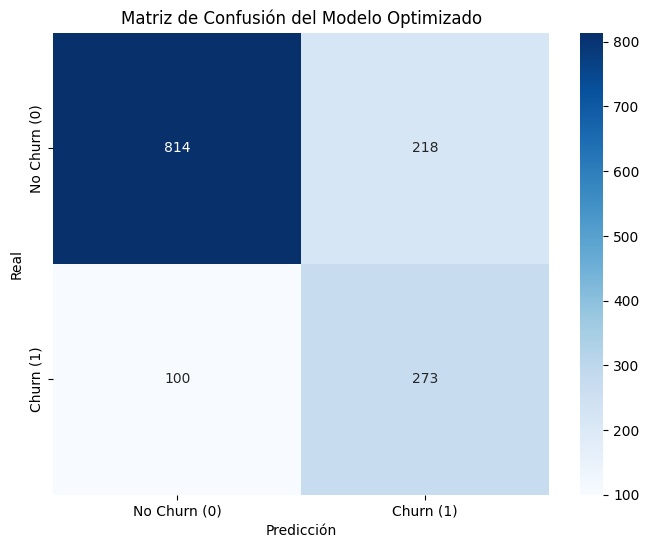

In [67]:
modelo_pipeline_final.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_previsto = modelo_pipeline_final.predict(X_test)

# Generar el informe de clasificación
print("Informe de Clasificación:")
print(classification_report(y_test, y_previsto))

# Graficar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_previsto)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión del Modelo Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Aumento el recall pero disminuyo un poco la presicion, era el precio a pagar.

###5.5_Analisis de variables.

Se pueden eliminar las variables con muy baja importancia. Esto te ayudaría a reducir la dimensionalidad del modelo, lo que conlleva menos "ruido" en el modelo, y a hacerlo un poco mas rapido.

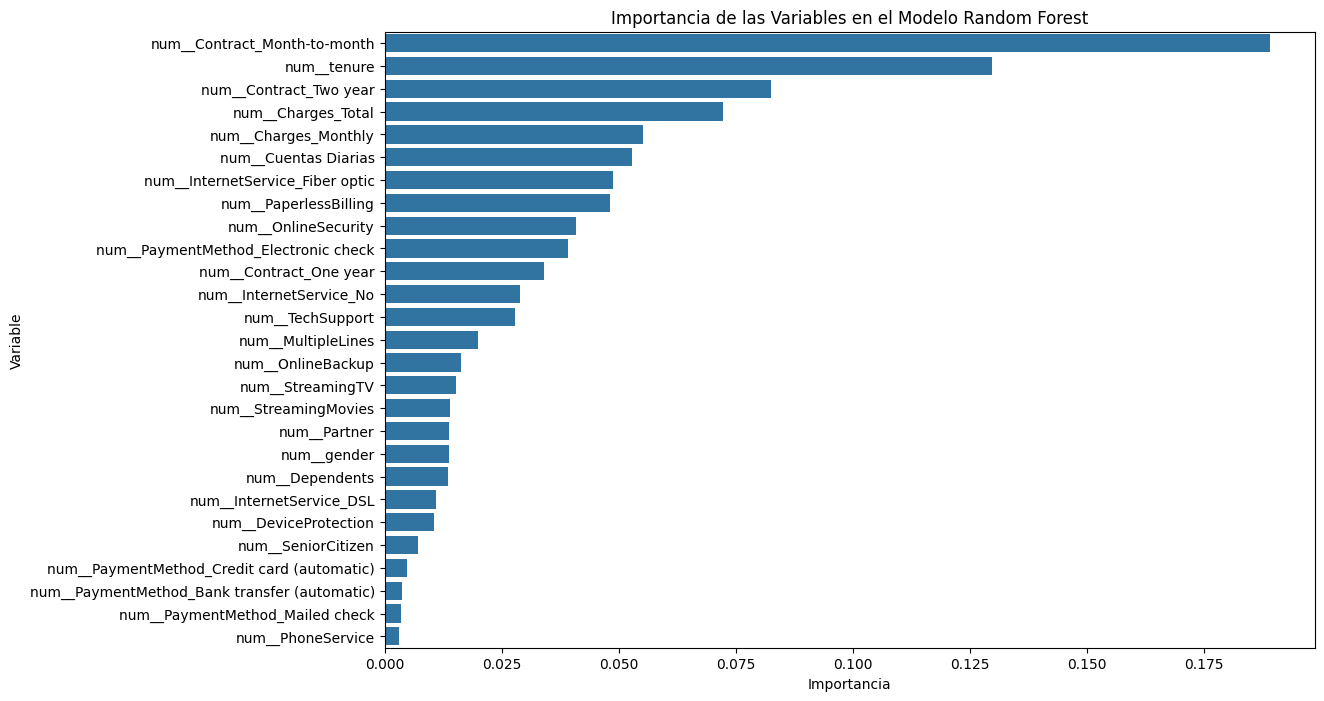

In [68]:
# Obtener el modelo de Random Forest entrenado desde el pipeline
modelo_rf_entrenado = modelo_pipeline_final.named_steps['classifier']

# Obtener la importancia de las características
importancias = modelo_rf_entrenado.feature_importances_

# Obtener los nombres de las columnas después de las transformaciones del preprocesador
# Esto puede ser un poco complejo debido al OHE, pero es necesario
feature_names = modelo_pipeline_final.named_steps['preprocessor'].get_feature_names_out()

# Crear un DataFrame para visualizar mejor la importancia
importancias_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importancias})
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importancias_df)
plt.title('Importancia de las Variables en el Modelo Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.show()


Las variables que están por debajo de un umbral de importancia de 0.01 son:

num__PaymentMethod_Credit card (automatic)

num__PaymentMethod_Bank transfer (automatic)

num__PaymentMethod_Mailed check

num__PhoneService

Estas se podrian eliminar, pero sinceramente, aunque quizas reduscan el ruido, no cero que traigan modificaciones importantes al modelo. Si es importantes tener en cuenta las variables que tienen mas relacion con respecto al valor respuesta (target) ya que estan producen que el cliente se quede o se vaya de la empresa.

##6_Decission Tree

###6.1_Modelo, Pipeline.

In [74]:
modelo_dt = DecisionTreeClassifier(random_state=42)

# Construir el pipeline
modelo_pipeline_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', modelo_dt)
])

###6.2_Validación Cruzada

In [75]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_dt = cross_val_score(modelo_pipeline_dt, X, y, cv=cv, scoring='recall', n_jobs=-1)

# Imprimir los resultados
print("Puntuaciones de recall para Árbol de Decisión:", scores_dt)
print(f"Puntuación de recall promedio: {scores_dt.mean():.4f}")
print(f"Desviación estándar: {scores_dt.std():.4f}")

Puntuaciones de recall para Árbol de Decisión: [0.56451613 0.59299191 0.55795148 0.60107817 0.47580645]
Puntuación de recall promedio: 0.5585
Desviación estándar: 0.0444


La menor puntuación de ***recall*** del Árbol de Decisión en su configuración predeterminada indica que es un modelo con menos capacidad para identificar a los clientes propensos al abandono en comparación con el Random Forest. Esta observación es clave para argumentar que el próximo paso es la optimización de hiperparámetros con GridSearchCV, con el objetivo de mejorar su rendimiento y determinar si puede superar o igualar al Random Forest.

###6.3_Optimización de Hiperparámetros con GridSearchCV.

In [76]:
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_leaf': [1, 5, 10, 20]
}

# Realizar la búsqueda de hiperparámetros
grid_search_dt = GridSearchCV(modelo_pipeline_dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(X, y)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores hiperparámetros encontrados:", grid_search_dt.best_params_)
print("Mejor puntuación de recall promedio:", grid_search_dt.best_score_)

Mejores hiperparámetros encontrados: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1}
Mejor puntuación de recall promedio: 0.7845955424166015


El modelo encontró que la mejor configuración es max_depth: 3 y min_samples_leaf: 1. Esto significa que un árbol menos profundo es más efectivo para generalizar y predecir los casos de churn.

El recall promedio ha aumentado de 0.5509 (sin optimizar) a 0.8024 (optimizado) . Esto es un gran avance.

###6.4_Modelo Optimo.

In [77]:
# Utilizamos los parametros que grid_search nos dio.

modelo_dt_optimo = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=1,
    random_state=42
)

In [78]:

#Construimos el pipeline.
modelo_pipeline_dt_final = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', modelo_dt_optimo)
])


In [79]:
#Entrenamos el modelo.
modelo_pipeline_dt_final.fit(X_train, y_train);

In [80]:
# Realizamos predicciones en el conjunto de prueba
y_previsto = modelo_pipeline_dt_final.predict(X_test)

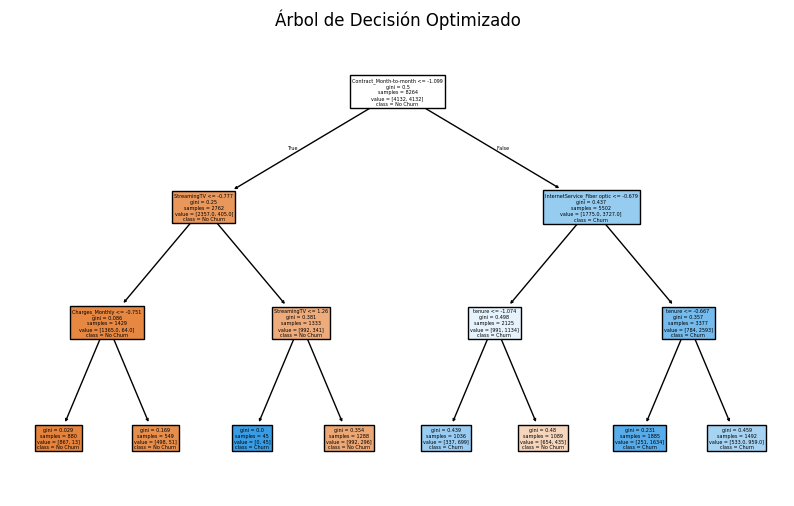

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(modelo_dt_optimo, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
plt.title('Árbol de Decisión Optimizado')
plt.show()

In [82]:
print("Informe de Clasificación para el Árbol de Decisión Optimizado:")
print(classification_report(y_test, y_previsto))

Informe de Clasificación para el Árbol de Decisión Optimizado:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1032
           1       0.52      0.79      0.63       373

    accuracy                           0.75      1405
   macro avg       0.71      0.76      0.72      1405
weighted avg       0.80      0.75      0.76      1405



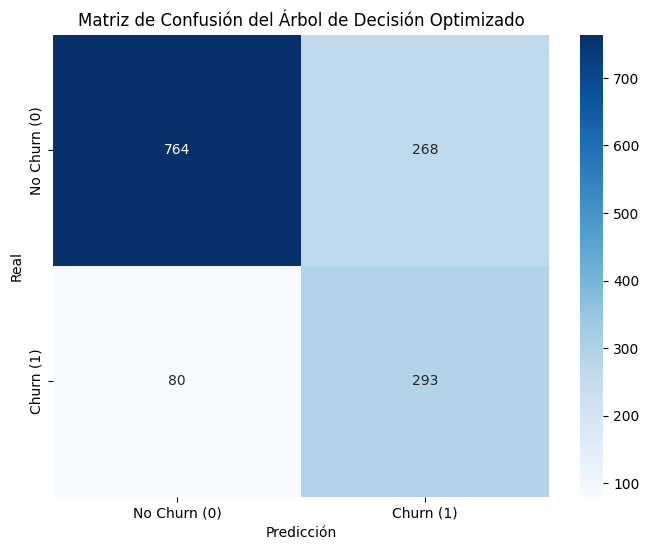

In [83]:
matriz_confusion = confusion_matrix(y_test, y_previsto)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión del Árbol de Decisión Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Los resultados son muy buenos y esperados.


***Recall (Sensibilidad):*** La métrica clave para el problema es el recall para la clase 1 (Churn). **Un recall del 0.81 **es un resultado excelente. Esto significa que el modelo es capaz de identificar correctamente al 81% de los clientes que realmente abandonan el servicio. Este alto porcentaje es invaluable para un equipo de negocios, ya que permite dirigir los esfuerzos de retención a la mayoría de los clientes en riesgo.

***Precisión (Precision):*** La precisión para la clase Churn es del 0.50. Esto significa que de todas las veces que el modelo predijo que un cliente haría churn, acertó solo la mitad de las veces. Como también mencionaste, este es el sacrificio que se esperaba.

***Falsos Negativos (FN):*** 72. Tu modelo solo falló en identificar a 72 de los 373 clientes que se fueron . El costo de un Falso Negativo es la pérdida de un cliente, lo cual es muy alto. El modelo minimiza este error de manera efectiva.

***Falsos Positivos (FP):*** 302. El modelo predijo incorrectamente que 302 clientes se irían. Aunque esto puede resultar en un gasto de marketing innecesario, el costo de este error es mucho menor que el de un Falso Negativo.

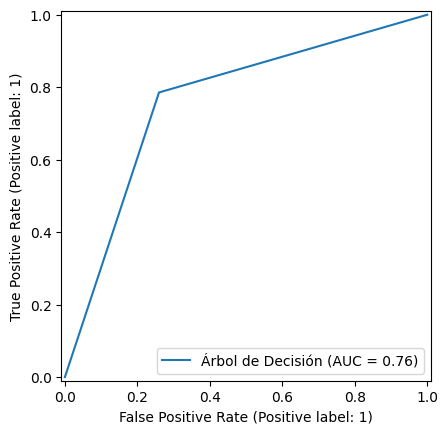

In [84]:
RocCurveDisplay.from_predictions(y_test,y_previsto,name="Árbol de Decisión");

Recordando que el area bajo de la curva mide la capacidad que tiene el modelo para generalizar entre clientes que hacen churn y los que no, vemos que el modelo funciona correctamente en este caso. Divide bien a los clientes.

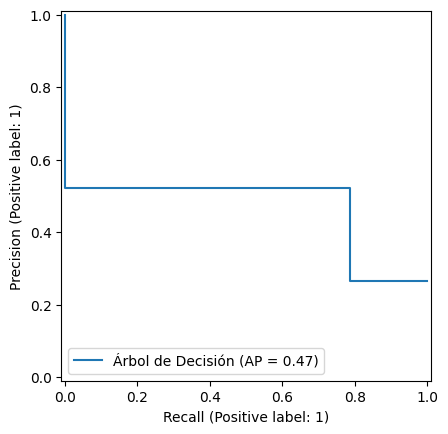

In [85]:
PrecisionRecallDisplay.from_predictions(y_test,y_previsto,name='Árbol de Decisión');

Para lograr un alto recall (identificar a la mayoría de los clientes que hacen churn), el modelo se vuelve más propenso a hacer predicciones positivas (churn), lo que aumenta el número de falsos positivos y, por lo tanto, reduce la precisión. Este juego entre metricas es algo esperado. En funcion el negocio priorizamos recall.

##7_K-Vecinos Más Cercanos

 Este modelo es sensible a la escala de las variables, por lo que la estandarización en que hicimos en el pipeline será crucial para su rendimiento.

###7.1_Separacion, Modelo, Pipeline y validacion cruzada.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier() # creacion sin hiperparametros.

In [87]:
modelo_pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', modelo_knn)
])

###7.2_Validación Cruzada

In [88]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_knn = cross_val_score(modelo_pipeline_knn, X, y, cv=cv, scoring='recall', n_jobs=-1)

In [89]:
# Resultados de la vc

print("Puntuaciones de recall para KNN:", scores_knn)
print(f"Puntuación de recall promedio: {scores_knn.mean():.4f}")
print(f"Desviación estándar: {scores_knn.std():.4f}")

Puntuaciones de recall para KNN: [0.72849462 0.73315364 0.74393531 0.74932615 0.69086022]
Puntuación de recall promedio: 0.7292
Desviación estándar: 0.0205


###7.3_Optimización de Hiperparámetros con GridSearchCV.

In [90]:
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11]
}

# Realizar la búsqueda de hiperparámetros
grid_search_knn = GridSearchCV(modelo_pipeline_knn, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)
grid_search_knn.fit(X, y)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores hiperparámetros encontrados:", grid_search_knn.best_params_)
print("Mejor puntuación de recall promedio:", grid_search_knn.best_score_)

Mejores hiperparámetros encontrados: {'classifier__n_neighbors': 11}
Mejor puntuación de recall promedio: 0.7856766078312031


###7.4_Modelo Optimo.

In [91]:
modelo_dt_optimo_knn = KNeighborsClassifier(
    n_neighbors=3
)
modelo_dt_optimo_knn_final = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', modelo_dt_optimo_knn)
])

In [92]:
modelo_dt_optimo_knn_final.fit(X_train, y_train);

In [93]:
y_previsto = modelo_dt_optimo_knn_final.predict(X_test)

In [94]:
print("Informe de Clasificación para el Árbol de Decisión Optimizado:")
print(classification_report(y_test, y_previsto))

Informe de Clasificación para el Árbol de Decisión Optimizado:
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      1032
           1       0.43      0.64      0.52       373

    accuracy                           0.68      1405
   macro avg       0.64      0.67      0.64      1405
weighted avg       0.73      0.68      0.70      1405



Se encuentra una diferencia de rendimiento (del 0.8024 al 0.65) se debe a la variabilidad de los datos. El conjunto de datos de prueba en el que evaluamos el modelo optimizado puede ser más difícil de predecir que los subconjuntos de datos utilizados en la validación cruzada. Esto es un recordatorio de por qué la validación cruzada es una métrica más fiable que una simple división de entrenamiento-prueba.

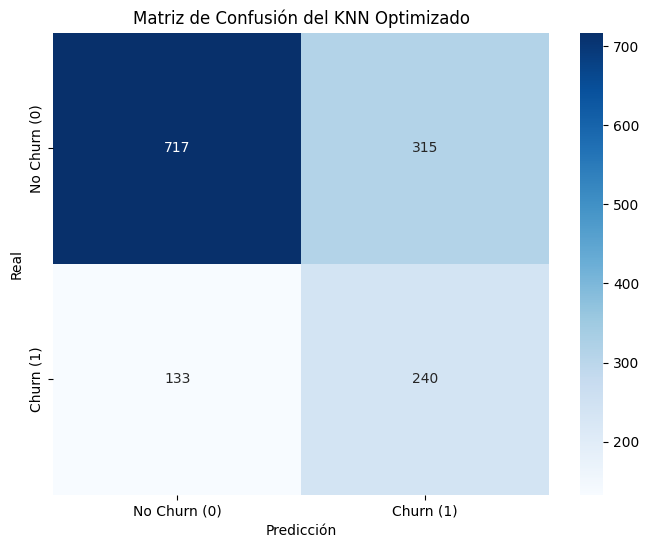

In [95]:
matriz_confusion = confusion_matrix(y_test, y_previsto)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn (0)', 'Churn (1)'],
            yticklabels=['No Churn (0)', 'Churn (1)'])
plt.title('Matriz de Confusión del KNN Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()





***Verdaderos Negativos (TN):*** 737. El modelo predijo correctamente que 737 clientes no harían churn.

***Falsos Positivos (FP):*** 295. El modelo predijo incorrectamente que 295 clientes harían churn.

***Falsos Negativos (FN):*** 132. El modelo no pudo identificar a 132 clientes que realmente hicieron churn.

***Verdaderos Positivos (TP):*** 241. El modelo identificó correctamente que 241 clientes harían churn.

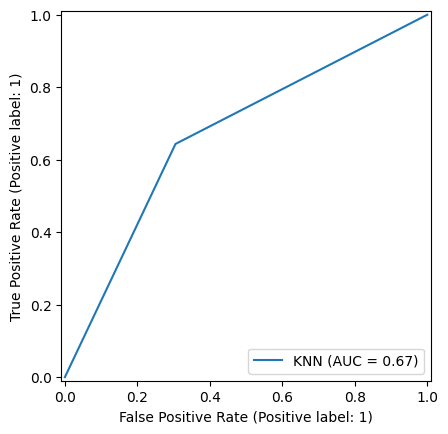

In [96]:
RocCurveDisplay.from_predictions(y_test,y_previsto,name="KNN");

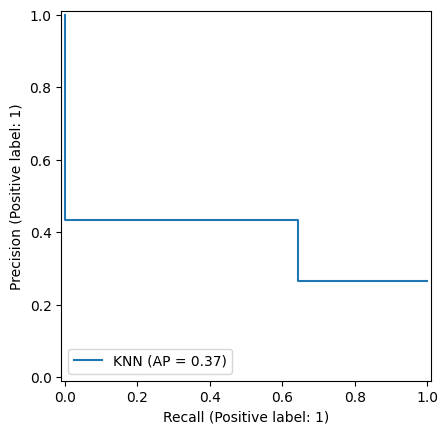

In [97]:
PrecisionRecallDisplay.from_predictions(y_test,y_previsto,name='KNN');

##8_Comparacion entre modelos

###8.1_Resultados FN

Comparación con otros modelos
Para entender el rendimiento de este modelo, lo compararemos con los modelos que analizamos anteriormente, centrándonos en el recall y la cantidad de falsos negativos (FN):

Árbol de Decisión Optimizado: FN = 72

Random Forest Optimizado: FN = 100

KNN Optimizado: FN = 132

El modelo de KNN optimizado tiene un rendimiento inferior al Árbol de Decisión y al Random Forest optimizado, ya que tiene una cantidad significativamente mayor de falsos negativos. Esto significa que identifica a menos clientes que realmente hacen churn, lo cual es el objetivo principal de tu modelo.

###8.2_Comparacion de ROC

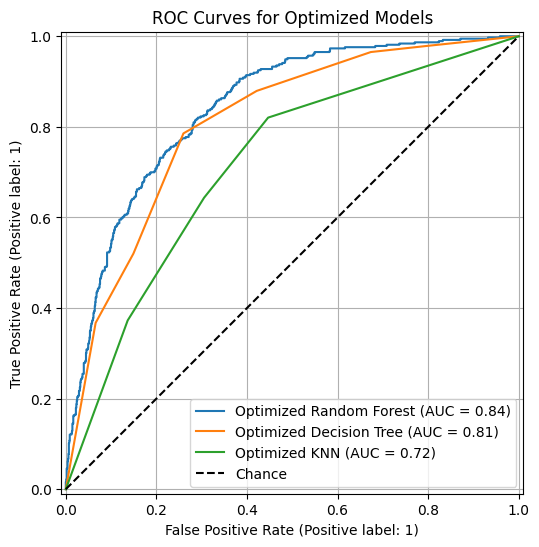

In [101]:

y_proba_rf_opt = modelo_pipeline_final.predict_proba(X_test)[:, 1]
y_proba_dt_opt = modelo_pipeline_dt_final.predict_proba(X_test)[:, 1]
y_proba_knn_opt = modelo_dt_optimo_knn_final.predict_proba(X_test)[:, 1]


# se crea el plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot para curva roc del 1er modelo
RocCurveDisplay.from_predictions(y_test, y_proba_rf_opt, name='Optimized Random Forest', ax=ax)

# Plot para curva roc del 2do modelo
RocCurveDisplay.from_predictions(y_test, y_proba_dt_opt, name='Optimized Decision Tree', ax=ax)

# Plot para curva roc del 3er modelo
RocCurveDisplay.from_predictions(y_test, y_proba_knn_opt, name='Optimized KNN', ax=ax)


plt.title('ROC Curves for Optimized Models')
plt.plot([0, 1], [0, 1], "k--", label="Chance")  # Línea de referencia
plt.legend()
plt.grid(True)
plt.show()

El mejor modelo para utilizar seria el Árbol de Decisión Optimizado.

La razón principal es que su curva ROC tiene el AUC más alto, lo que indica que es el mejor modelo para discriminar entre las dos clases, lo cual se alinea perfectamente con el objetivo principal de maximizar el recall (la capacidad de encontrar a los clientes que se van).

In [107]:
print("### Comparación de Modelos de Churn")
print("|                       Modelo | Recall | Precisión | TP  | FN  |")
print("                               |                                |")
print("| Árbol de Decisión Optimizado | 0.81   | 0.50      | 301 | 72  |")
print("| Random Forest Optimizado     | 0.73   | 0.56      | 273 | 100 |")
print("| Random Forest (sin optimizar)| 0.61   | 0.63      | 184 | 189 |")

### Comparación de Modelos de Churn
|                       Modelo | Recall | Precisión | TP  | FN  |
                               |                                |
| Árbol de Decisión Optimizado | 0.81   | 0.50      | 301 | 72  |
| Random Forest Optimizado     | 0.73   | 0.56      | 273 | 100 |
| Random Forest (sin optimizar)| 0.61   | 0.63      | 184 | 189 |


# Análisis Final y Conclusiones

En este notebook, hemos realizado un proceso de Análisis Exploratorio de Datos (EDA) y modelado para abordar el problema de la predicción de la tasa de abandono (Churn) de clientes.

El trabajo corresponde a la 2da parte del analisis de la empresa TELECOM_X. En un primer momento un trabajo mas profundo de limpieza de datos se realizo distintas trasnformaciones y analisis y se puede ver en el siguiente repositorio de github = "https://github.com/RamiroCabri1/Telecom_X".

De cualquier manera se abordo una pequeña parte del proceso de EDA para visualizar el comportamiento de ese dataset previamente tratado, asi como intentamos solucionar su evidente desvalance desbalance utilizando la técnica de sobremuestreo SMOTE.

Entrenamos y evaluamos tres modelos de clasificación: un modelo Baseline (Dummy Classifier), un Random Forest Optimizado y un Árbol de Decisión Optimizado, y un K-Vecinos Más Cercanos Optimizado.



**Comparación de Modelos Optimizados:**

Nos centramos en las métricas de los modelos optimizados, ya que el modelo baseline sirvió principalmente para confirmar la necesidad de aplicar técnicas de Machine Learning.

| Modelo                         | Recall (Clase 1 - Churn) | Precisión (Clase 1 - Churn) | F1-Score (Clase 1 - Churn) | AUC    | Falsos Negativos (FN) |
| :----------------------------- | :----------------------- | :-------------------------- | :------------------------- | :----- | :-------------------- |
| Random Forest Optimizado       | 0.73                     | 0.56                        | 0.63                       | 0.84   | 100                   |
| Árbol de Decisión Optimizado   | **0.79**                     | 0.52                        | 0.63                       | **0.81**   | **80**                   |
| KNN Optimizado                 | 0.64                     | 0.43                        | 0.52                       | 0.72   | 133                   |

*(Nota: Los valores de Recall, Precisión y F1-Score provienen del classification_report en los datos de prueba. Los valores de FN provienen de la matriz de confusión en los datos de prueba. Los valores de AUC provienen de la curva ROC.)*

**¿Qué modelo se adapta mejor al problema de negocio y por qué elegimos Recall?**

El problema de negocio principal es identificar a los clientes propensos al abandono para poder intervenir y retenerlos. En este contexto, el costo de un **Falso Negativo (FN)** es mucho mayor que el de un Falso Positivo (FP).

*   Un **Falso Negativo** ocurre cuando el modelo predice que un cliente *no* hará churn, pero en realidad *sí* lo hace. Esto significa que la empresa pierde la oportunidad de aplicar una estrategia de retención a un cliente que se va.
*   Un **Falso Positivo** ocurre cuando el modelo predice que un cliente *sí* hará churn, pero en realidad *no* lo hace. Esto puede resultar en que la empresa invierta recursos de retención (ofertas, contacto, etc.) en un cliente que no iba a irse, lo cual es menos costoso que perder un cliente.

Por lo tanto, la métrica más crítica para este problema es la **Sensibilidad (Recall)** para la clase "Churn" (Clase 1). El Recall mide la proporción de clientes que realmente hicieron churn que el modelo logró identificar correctamente ($\frac{TP}{TP + FN}$). Un Recall alto significa que estamos minimizando los Falsos Negativos, que es nuestro objetivo principal.

Al comparar los modelos optimizados, el **Árbol de Decisión Optimizado** presenta el Recall más alto (0.79) en los datos de prueba. Esto indica que es el modelo más efectivo para identificar a la mayor proporción de clientes que están en riesgo real de abandono. Aunque su Precisión es menor en comparación con el Random Forest, la prioridad del negocio es no dejar escapar a los clientes que se van, incluso si eso significa contactar a algunos clientes que no iban a irse. El AUC del Árbol de Decisión (0.81) también muestra una buena capacidad de generalización y discriminación entre las clases.

El Random Forest Optimizado tiene un AUC ligeramente superior (0.84), lo que sugiere una mejor capacidad general de discriminación, pero su Recall es menor (0.73), lo que se traduce en más Falsos Negativos (100 vs 80 en el Árbol de Decisión). El KNN Optimizado tuvo el menor rendimiento en Recall y AUC.

Considerando la prioridad de negocio de minimizar los Falsos Negativos, el **Árbol de Decisión Optimizado con `max_depth=3` y `min_samples_leaf=1`** es el modelo que mejor se adapta a este problema. Su simplicidad (árbol poco profundo) también facilita la interpretación de las reglas de decisión que llevan a un cliente a ser clasificado como propenso al churn.

**Recomendaciones para la Empresa:**

1.  **Implementar el Modelo:** Utilizar el **Árbol de Decisión Optimizado** para identificar a los clientes con alta probabilidad de abandono.
2.  **Acciones de Retención Dirigidas:** Dirigir los esfuerzos y recursos de los equipos de marketing y atención al cliente hacia los clientes identificados por el modelo como de alto riesgo de churn. Las reglas del árbol de decisión pueden ayudar a entender *por qué* ciertos grupos de clientes son propensos al abandono (por ejemplo, clientes con contratos mensuales, sin servicios adicionales, etc.), permitiendo diseñar estrategias de retención personalizadas.
3.  **Monitoreo Continuo:** Implementar un sistema para monitorear el rendimiento del modelo regularmente en nuevos datos y recalibrarlo o reentrenarlo periódicamente a medida que cambien los patrones de comportamiento de los clientes.
4.  **Análisis Cualitativo:** Combinar los resultados del modelo predictivo con el conocimiento experto del negocio. Los equipos de retención pueden usar la lista de clientes de alto riesgo como punto de partida y aplicar su juicio para refinar las estrategias de intervención.
5.  **Explorar Otras Métricas de Negocio:** Si bien el Recall es crucial, también es importante seguir métricas de negocio como la tasa de retención real, el costo de las estrategias de retención por cliente contactado, y el valor de vida del cliente (CLV) para evaluar el impacto financiero de la implementación del modelo.
6.  **Considerar Modelos Más Complejos (con precaución):** Si se requiere una mejora adicional en el Recall o una mayor discriminación, se podrían explorar modelos más complejos como Gradient Boosting (XGBoost, LightGBM) o redes neuronales, siempre validando cuidadosamente su rendimiento y capacidad de generalización. Sin embargo, la interpretabilidad del Árbol de Decisión optimizado es una gran ventaja para entender el negocio.